In deze code ben ik bezig geweest met de data exploratie, statistische data analyse en data visualisatie

In [1]:
#Eerst pandas importeren om er mee te werken
import pandas as pd

# maak een dataframe van het bestand data.csv en splits de data per ;
df = pd.read_csv('data.csv')


In [2]:
# Eerste paar rijen weergeven
print(df.head())


  First name       Last name          Position title  \
0    Viviana  's Gravensande         Sales Associate   
1     Carrol  's Gravensande       Financial Analyst   
2     Amalie  's Gravensande       Financial Analyst   
3  Viridiana  's Gravensande  Airport Services Agent   
4      Shara  's Gravensande  Communications Officer   

                  Full name        Age  Base pay (full-time)  \
0    Viviana 's Gravensande  31.166667          29989.765171   
1     Carrol 's Gravensande  44.666667          70506.994176   
2     Amalie 's Gravensande  37.250000          59590.273145   
3  Viridiana 's Gravensande  30.000000          24615.216690   
4      Shara 's Gravensande  31.250000          27119.000000   

  Base pay (full-time) - currency  Base pay (part-time)  \
0                             EUR          23991.812137   
1                             EUR          56405.595341   
2                             EUR          47672.218516   
3                             EUR         

In [3]:
#Laat meer informatie zien van de df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Columns: 110 entries, First name to Years of service
dtypes: bool(3), float64(30), int64(10), object(67)
memory usage: 22.4+ MB
None


In [4]:
#print de beschrijvende statistiek
print(df.describe())

                Age  Base pay (full-time)  Base pay (part-time)  \
count  27285.000000          27285.000000          27285.000000   
mean      34.141885          37851.589712          33312.561726   
std        6.904868          28344.950818          27808.611211   
min       20.333333            402.990788            402.990788   
25%       29.833333          20440.628863          16488.735397   
50%       32.333333          31880.000000          26752.000000   
75%       35.666667          48158.588394          41666.000000   
max       71.333333         678885.000000         543108.000000   

       Cost of Employment (TCOE)   Direct span  Employee engagement  \
count               2.728500e+04  27285.000000         27285.000000   
mean                5.059007e+04      0.999963            38.217006   
std                 4.520516e+04      4.296452            35.288656   
min                 5.234071e+02      0.000000          -100.000000   
25%                 2.567553e+04      0.0

In [5]:
piloten_df = df[df['Functional area level 2'] == 'Pilots']
#Bereken de gem. leeftijd uit de kolom age uit het df en gebruik methode .mean() en print deze
gemiddelde_leeftijd_piloten = piloten_df['Age'].mean()
print(gemiddelde_leeftijd_piloten)

43.34684123025769


In [6]:
#Bereken de standaard deviatie van de leeftijd uit de kolom age uit het df en gebruik methode .std() en print deze
standaard_deviatie_piloten = piloten_df['Age'].std()
print(standaard_deviatie_piloten)

6.442441359152527


Hier begin ik met de Exploratie van de data

In [7]:
#Importeren numpy
import numpy as np

In [8]:
#Importern van mattplotlib 
import matplotlib.pyplot as plt

In [9]:
#Bereken van missende waarde in dataset
missende_waarde = piloten_df.isnull().sum()
print(missende_waarde)

First name                                            0
Last name                                             0
Position title                                        0
Full name                                             0
Age                                                   0
                                                     ..
Total labor cost (in original currency) - currency    0
Work location                                         0
Work related accident                                 0
Years in position                                     0
Years of service                                      0
Length: 110, dtype: int64


In [10]:
#Een variabele aangemaakt die alleen kolomen toont die missende waarde bevatten
kolommen_missende_waarde = missende_waarde[missende_waarde > 0]
print(kolommen_missende_waarde)

Business unit level 3                              1604
Business unit level 4                              1604
Diversity training                                  244
Intent to Leave                                    1604
Is demotion                                          23
Is lateral move                                      23
Is promotion                                         23
Leave reason level 2                               1592
Managerial hierarchy level 6                        562
Managerial hierarchy level 7                       1604
Managerial hierarchy level 8                       1604
Month of leaving                                   1592
Race & ethnicity level 2                           1505
Sales revenue                                      1604
Sales revenue (in original currency)               1604
Sales revenue (in original currency) - currency    1604
Sales training                                      265
Skill match                                     

Hierboven zien wij hoeveel missende waarden er per kolom zijn. Hier heb ik de kolommen die een waarde meer dan 0 bevatten eruit gefilterd omdat deze niks zeggen.

Ik ga nu kijke naar de verspreiding van enkele variabele van piloten.

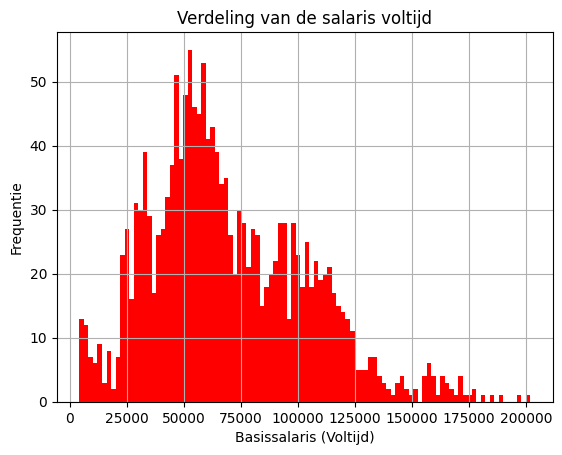

In [11]:
#Verdeling van het salaris bij voltijd bekijken in een historgam
#De juiste kolom aanroepen en de .hist functie voor een histogram, de interval en de kleur geef je als input mee

piloten_df['Base pay (full-time)'].hist(bins=100, color='red')

#Matplotlib titel x- en y-as label meegeven en laten zien

plt.title('Verdeling van de salaris voltijd')
plt.xlabel('Basissalaris (Voltijd)')
plt.ylabel('Frequentie')
plt.show()

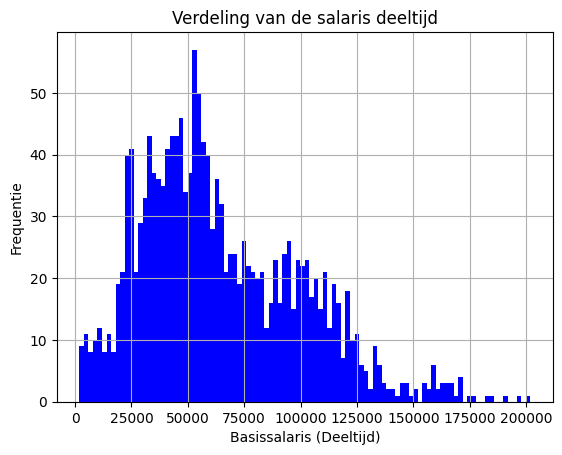

In [12]:
#Verdeling van het salaris bij deeltijd bekijken in een historgam

piloten_df['Base pay (part-time)'].hist(bins=100, color='blue')

#Matplotlib titel x- en y-as label meegeven en laten zien

plt.title('Verdeling van de salaris deeltijd')
plt.xlabel('Basissalaris (Deeltijd)')
plt.ylabel('Frequentie')
plt.show()

In bovenstaande visualisaties zie je de verdeling van het deeltijd en voltijd salaris onder piloten. Zoals je ziet lijken deze allebei rechtsscheef verdeelt te zijn. Om dit statistisch aan te tonen bereken ik de p-waarde. 

In [13]:
from scipy.stats import shapiro, skew

# Bereken de skewness-waarde (scheefheid)
salaris_data = piloten_df['Base pay (full-time)']
skewness = skew(salaris_data)
print(f"Skewness (scheefheid): {skewness}")

# Shapiro-Wilk-test om te controleren op normaliteit
stat, p_value = shapiro(salaris_data)
print(f"Shapiro-Wilk Test: Statistiek = {stat}, p-waarde = {p_value}")

# Interpretatie van de resultaten
if p_value < 0.05:
    print("De verdeling is significant niet normaal (p < 0.05), wat wijst op scheefheid.")
else:
    print("De verdeling is niet significant afwijkend van normaal (p >= 0.05).")


Skewness (scheefheid): 0.6711722778442936
Shapiro-Wilk Test: Statistiek = 0.9682370314280813, p-waarde = 2.6066954241145346e-18
De verdeling is significant niet normaal (p < 0.05), wat wijst op scheefheid.


In [39]:
from scipy.stats import shapiro, skew

# Bereken de skewness-waarde (scheefheid)
salaris_data = piloten_df['Base pay (part-time)']
skewness = skew(salaris_data)
print(f"Skewness (scheefheid): {skewness}")

# Shapiro-Wilk-test om te controleren op normaliteit
stat, p_value = shapiro(salaris_data)
print(f"Shapiro-Wilk Test: Statistiek = {stat}, p-waarde = {p_value}")

# Interpretatie van de resultaten
if p_value < 0.05:
    print("De verdeling is significant niet normaal (p < 0.05), wat wijst op scheefheid.")
else:
    print("De verdeling is niet significant afwijkend van normaal (p >= 0.05).")


Skewness (scheefheid): 0.7359130859537697
Shapiro-Wilk Test: Statistiek = 0.9580712508387484, p-waarde = 4.417920163307056e-21
De verdeling is significant niet normaal (p < 0.05), wat wijst op scheefheid.


De extreem lage p-waarden bevestigt dat de verdeling duidelijk afwijkt van normaal. In combinatie met de positieve skewness-waarden wijzen op een scheefverdeling naar rechts, wat betekent dat de data een langere staart aan de rechterkant heeft.

In een scatterplot zet ik punten op een grafiek om het verband tussen twee variabelen te bekijken. Elke punt stelt één observatie voor, met de waarde van de ene variabele op de x-as en de waarde van de andere variabele op de y-as. Door de punten te bekijken, kan ik zien of er een patroon of trend is, zoals een stijgende lijn, daling, of juist geen duidelijk verband tussen de twee variabelen. Hieronder doe ik dat met de leeftijd en salaris van piloten

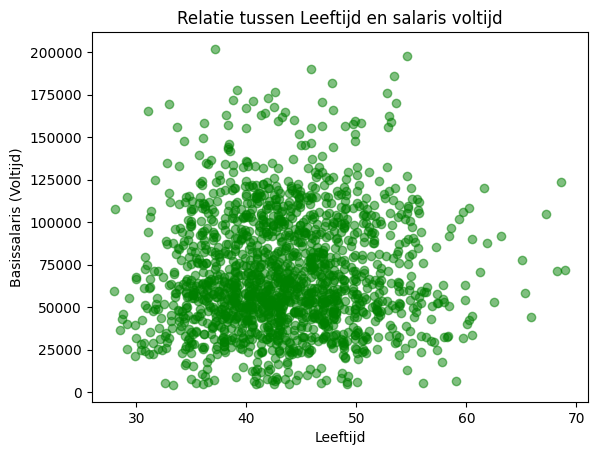

In [14]:
#Relatie tussen 2 variabele met scatter plot

#Scatter plot relatie tussen leeftijd en het salaris voltijd
#Functie voor scatterplot, variabele meegeven, transparantie punten en kleur
plt.scatter(piloten_df['Age'], piloten_df['Base pay (full-time)'], alpha=0.5, c='green')

#Matplotlib titel x- en y-as label meegeven en laten zien
plt.title('Relatie tussen Leeftijd en salaris voltijd')
plt.xlabel('Leeftijd')
plt.ylabel('Basissalaris (Voltijd)')
plt.show()


De scatterplot toont geen duidelijke relatie tussen leeftijd en het basissalaris (voltijd). De punten zijn verspreid over de grafiek zonder een duidelijke trend of patroon, wat suggereert dat leeftijd geen sterke invloed heeft op het salaris.

Hier begint de statistische data analyse

In [15]:
#Hier bereken ik het gemiddelde en de standaarddeviatie van het salaris voltijd
gemiddelde_salaris = piloten_df['Base pay (full-time)'].mean()
standaard_deviatie_salaris = piloten_df['Base pay (full-time)'].std()
print(f'gemiddelde: {gemiddelde_salaris}, standaarddeviatie: {standaard_deviatie_salaris}')

gemiddelde: 69276.54596345549, standaarddeviatie: 34079.45763193354


In [16]:
# Hier ga ik het gemiddelde salaris voltijd bereken per functie
# Hiervoor gebruik ik de functie groupby en .mean bij salaris voor het gemiddelde
functie_gem_salaris = df.groupby('Position title')['Base pay (full-time)'].mean()
#print de functie
print(functie_gem_salaris)


Position title
Account Manager              69486.941117
Accountant                  105238.244683
Accounting Intern             5778.208062
Aircraft Cleaner             15865.358137
Airline Captain              92246.542886
                                ...      
Tax Manager                  27930.040270
Tax Specialist               19682.586177
Team Lead Credit Control     30066.796309
Trainer                      39490.500000
Warehouse Agent              55921.990557
Name: Base pay (full-time), Length: 216, dtype: float64


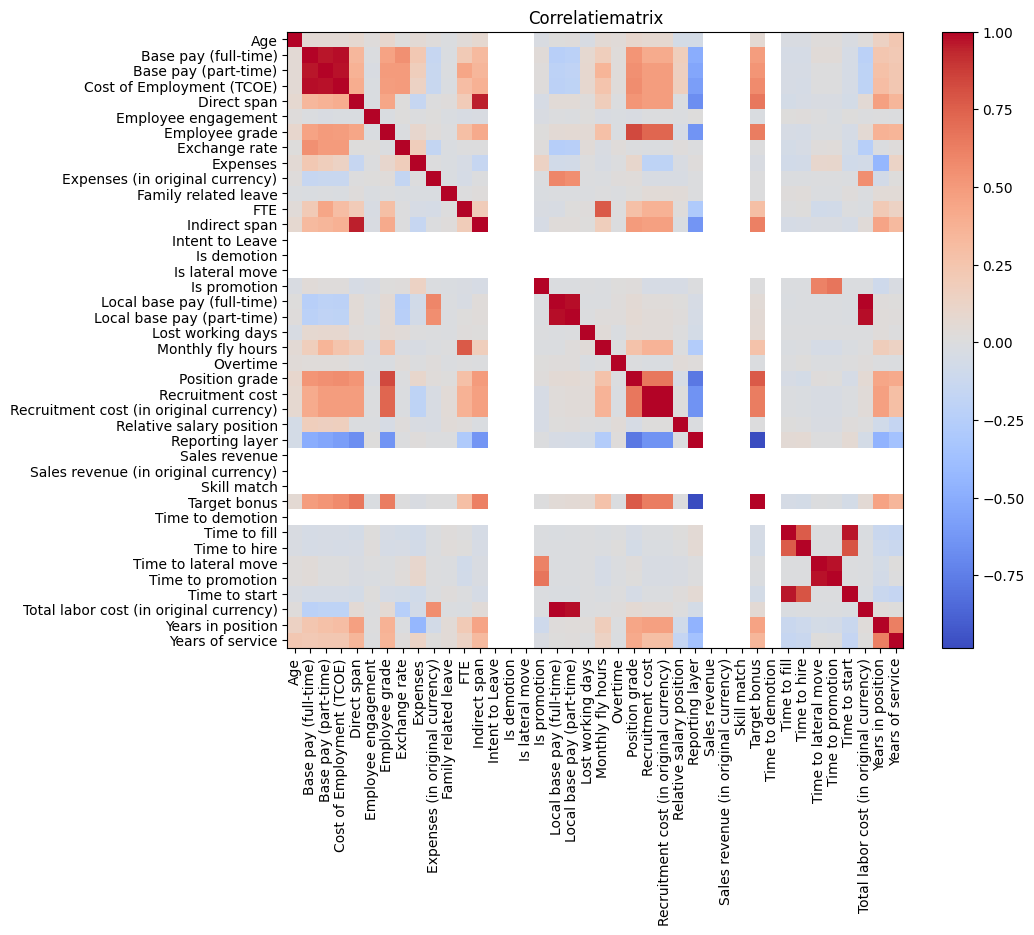

In [17]:
# Correlatiematrix maken om correlatie tussen variabele te vinden


# Alle kolommen met numerieke waarden eruit filteren met functie select_dtypes
nummerieke_kolommen = piloten_df.select_dtypes(include=[np.number])

# Vervangen van alle ontbrekende waarde anders werk correlatiematrix niet met panda functie fillna()
nummerieke_kolommen.fillna(0, inplace=True)

# Berekenen van de colleratie matrix
correlatie_matrix = nummerieke_kolommen.corr()

# Om de Correlatiematrix te testen even printen
#print(correlatie_matrix)

#Matplotlib functies voor visualisatie
plt.figure(figsize=(10, 8))
plt.imshow(correlatie_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

#Bepaal de x en y-as met de waardes van 0 tot de lenge van correlatie_matrix
plt.xticks(range(len(correlatie_matrix)), correlatie_matrix.columns, rotation=90)
plt.yticks(range(len(correlatie_matrix)), correlatie_matrix.columns)
plt.title('Correlatiematrix')
plt.show()


Uit de correlatiematrix blijkt dat *Base pay (full-time)* sterk positief gecorreleerd is met *Cost of Employment (TCOE)* en *Position grade*, wat betekent dat hogere functies en totale arbeidskosten vaak samengaan met een hoger salaris. Daarnaast vertoont *Years of service* een positieve correlatie met het salaris, wat suggereert dat langer dienstverband vaak leidt tot hogere lonen. *Monthly fly hours* heeft nauwelijks invloed op het salaris, wat aangeeft dat vlieguren geen grote rol spelen in de beloningsstructuur.

Hieronder komen enkele data visualisatie

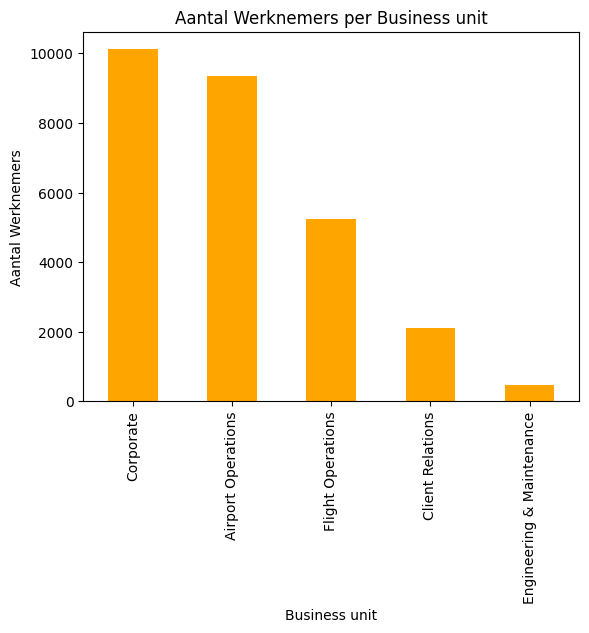

In [18]:
# Visualisatie van het aantal werknemers per business unit met een barchart

# maakt een dataframe die de unieke waardes telt voor de kolom .plot maakt een staafdiagram
df['Business unit level 1'].value_counts().plot(kind='bar', color='orange')
plt.title('Aantal Werknemers per Business unit')
plt.xlabel('Business unit')
plt.ylabel('Aantal Werknemers')
plt.show()



De meeste werknemers zitten in *Corporate* en *Airport Operations*, terwijl *Engineering & Maintenance* het minste aantal medewerkers heeft.

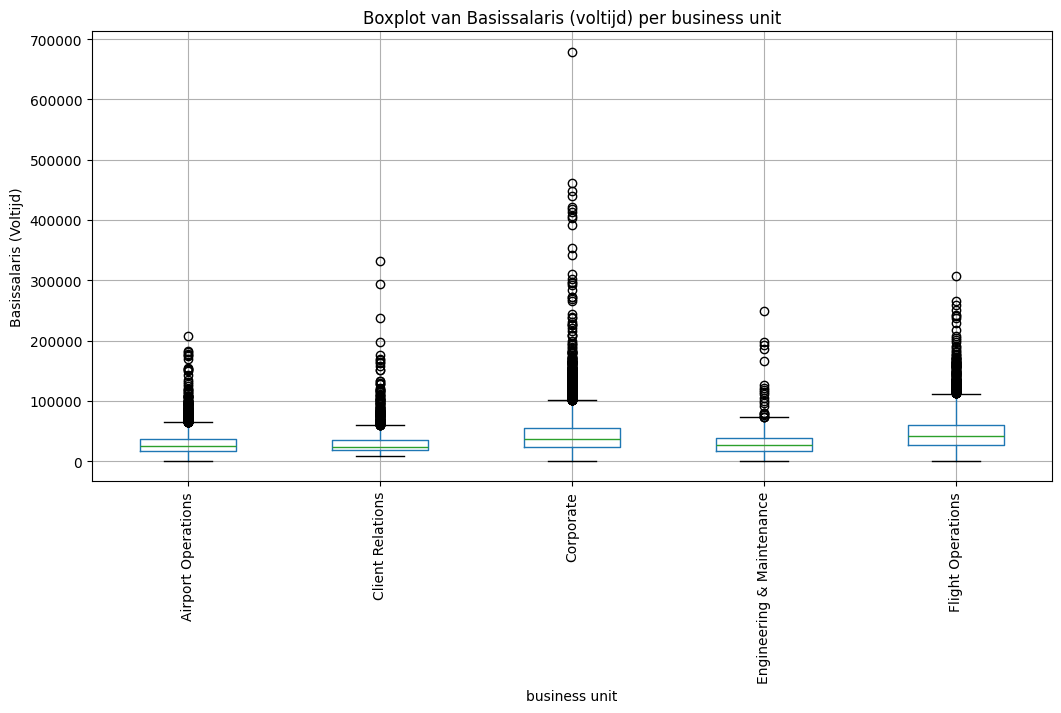

In [19]:
# Boxplot voor salaris voltijd per business unit

#Hier gebruik ik de functie.boxplot geef ik de variable mee en het formaat
df.boxplot(column='Base pay (full-time)', by='Business unit level 1', figsize=(12, 6))

plt.title('Boxplot van Basissalaris (voltijd) per business unit')
plt.xlabel('business unit')
plt.ylabel('Basissalaris (Voltijd)')
plt.suptitle('')  # Verwijdert de standaard suptitle
plt.xticks(rotation=90)  # Roteren van de functie labels als deze te lang zijn
plt.show()


In de boxplot is te zien dat het basissalaris (voltijd) per business unit vergelijkbaar is, met de meeste salarissen rond een centrale waarde. Alle units vertonen enkele uitschieters met hoge salarissen, vooral bij *Corporate* en *Engineering & Maintenance*.

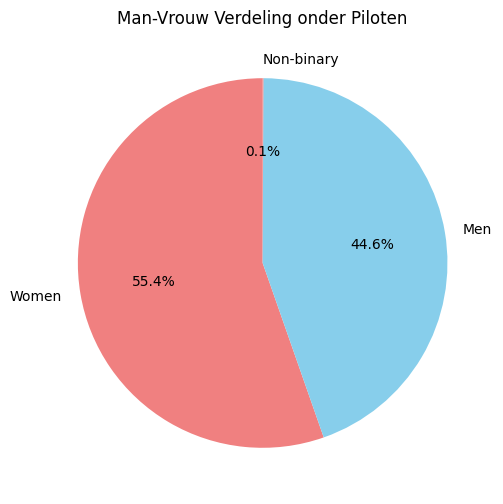

In [20]:
#Maak df voor piloten
piloten_df = df[df['Functional area level 2'] == 'Pilots']

#Bereken de gender
gender_verdeling = piloten_df['Gender'].value_counts()

# Hier maak ik een man-vrouw verdeling van de pioten in een circeldiagram
plt.figure(figsize=(6, 6))
gender_verdeling.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Man-Vrouw Verdeling onder Piloten')
plt.ylabel('')  # Verwijder het label van de y-as
plt.show()


Uit de grafiek blijkt dat de meerderheid van de piloten vrouwen zijn (55.4%), gevolgd door mannen (44.6%), terwijl een klein percentage (0.1%) non-binair is.

In [21]:
# Stel eerst groepen in voor salarisniveaus
salaris_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, np.inf]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']

# Voeg een nieuwe kolom toe aan de dataset met de salarisgroepen
piloten_df['Salaris groep'] = pd.cut(piloten_df['Base pay (full-time)'], bins=salaris_bins, labels=labels)

# Maak een kruistabel voor de verdeling per salarisgroep - aantallen
verdeling_aantallen = pd.crosstab(piloten_df['Salaris groep'], piloten_df['Gender'])

# Voeg een extra kolom toe met het totaal aantal piloten per salarisgroep
verdeling_aantallen['Totaal aantal'] = verdeling_aantallen.sum(axis=1)

# Maak een kruistabel voor de verdeling per salarisgroep - percentages
verdeling_percentages = pd.crosstab(piloten_df['Salaris groep'], piloten_df['Gender'], normalize='index') * 100

# Voeg de aantallen en percentages samen in één tabel
verdeling_combined = verdeling_aantallen.iloc[:, :-1].astype(str) + " (" + verdeling_percentages.round(1).astype(str) + "%)"
verdeling_combined['Totaal aantal'] = verdeling_aantallen['Totaal aantal']

# Toon de gecombineerde tabel
verdeling_combined


C:\Users\merli\AppData\Local\Temp\ipykernel_46500\3762077362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piloten_df['Salaris groep'] = pd.cut(piloten_df['Base pay (full-time)'], bins=salaris_bins, labels=labels)


Gender,Men,Non-binary,Women,Totaal aantal
Salaris groep,,,,
0-25k,32 (32.0%),0 (0.0%),68 (68.0%),100
25k-50k,136 (34.3%),0 (0.0%),261 (65.7%),397
50k-75k,213 (42.3%),0 (0.0%),290 (57.7%),503
75k-100k,110 (37.9%),1 (0.3%),179 (61.7%),290
100k-150k,192 (70.1%),0 (0.0%),82 (29.9%),274
150k-200k,31 (79.5%),0 (0.0%),8 (20.5%),39
200k+,1 (100.0%),0 (0.0%),0 (0.0%),1


De tabel laat zien dat vrouwen vooral vertegenwoordigd zijn in de lagere salarisgroepen (0-75k), terwijl mannen oververtegenwoordigd zijn in de hogere salarisgroepen (100k+). Er is slechts één non-binaire piloot in de dataset, die zich in de salarisgroep 75k-100k bevindt.

Voor ons businessprobleem het te kort aan piloten. Kijken wij naar de volgende variabele ziekte verzuim, piloten instroom en werving (kanaal en kosten). Vanaf hier werk ik ook met de CSV die gecombineerde timestamps heeft tijdsgebonden analyses te doen.

In [22]:
#Hier gebruik ik de gecombineerde dataset (Transform stap) als ik deze print zie je ook de toegevoegde timestamps
samengevoegde_df = pd.read_feather('employee_data_complete.feather')
df = samengevoegde_df[samengevoegde_df['Functional area level 2'] == 'Pilots']
print(df.head())

           First name Last name  Position title  Employee engagement  \
Timeslice                                                              
2020-08-31   Lilyanna      Abad  Second Officer                   17   
2020-08-31      Ellar   Abellán    Junior Pilot                  100   
2020-08-31     Karter     Abril    Junior Pilot                    5   
2020-08-31     Shayla     Abril  Second Officer                   90   
2020-08-31    Ellamae   Abshire    Junior Pilot                   26   

                  Full name        Age  Base pay (full-time)  \
Timeslice                                                      
2020-08-31    Lilyanna Abad  43.583333          57636.955167   
2020-08-31    Ellar Abellán  46.000000          59842.875358   
2020-08-31     Karter Abril  35.000000          28998.394396   
2020-08-31     Shayla Abril  51.666667          73519.095977   
2020-08-31  Ellamae Abshire  46.916667          53656.000000   

           Base pay (full-time) - currency  Ba

In [23]:
#Correlatie bekijken tussen kosten van de werving piloot en het aantal piloten per maand
groupby_month = df.groupby(df.index)
groupby_month[['Recruitment cost', 'Is hire']].sum().corr()


,Recruitment cost,Is hire
Recruitment cost,1.000000,0.241276
Is hire,0.241276,1.000000


De tabel toont een correlatie van 0.24 tussen Recruitment cost en Is hire, wat wijst op een zwakke positieve relatie

In [24]:
# Filter de dataset om alleen de rijen te behouden waar 'Functional area level 2' gelijk is aan 'Pilots'
samengevoegde_piloten_df = samengevoegde_df[samengevoegde_df['Functional area level 2'] == 'Pilots']

# Stap 1: One-hot encoding toepassen op de 'Recruitment method' kolom van de gefilterde dataset
df_encoded = pd.get_dummies(samengevoegde_piloten_df, columns=['Hiring channel'], prefix='method')

# Stap 2: De dataset groeperen per maand
groupby_month = df_encoded.groupby(df_encoded.index)

# Stap 3: De som berekenen van de one-hot encoded kolommen en de 'Is hire' kolom per maand
grouped_data = groupby_month[[col for col in df_encoded.columns if 'method_' in col] + ['Is hire']].sum()

# Stap 4: De correlatie berekenen tussen de verschillende wervingsmethoden en het aantal aangenomen piloten ('Is hire')
correlation_matrix = grouped_data.corr()

# Stap 5: Extract specifiek de correlatie tussen wervingsmethoden en 'Is hire'
correlation_with_hires = correlation_matrix['Is hire'][[col for col in grouped_data.columns if 'method_' in col]]

# Toon de correlaties
print(correlation_with_hires)

method_Corporate Website     0.601686
method_Glassdoor             0.569205
method_Instagram             0.600844
method_LinkedIn              0.568920
method_Missing              -0.517166
method_Own recruiters        0.588372
method_Recruitment agency    0.559356
method_Referral              0.568870
method_University            0.570710
Name: Is hire, dtype: float64


Uit deze correlatiematrix kan je zien welke methoden het beste heeft gewerkt om mensen aan te nemen. In dit geval zou je kunnen adviseren om bepaalde methode prioriteit te geven bij wervingmethoden.


Ik ga nu onderzoeken wat de gemiddelde kosten per piloot waren, uitgesplitst per wervingsmethode.

In [25]:
# Print enkel de kolom 'Total labor cost (in original currency)' en toon de eerste paar rijen (head) van de gefilterde dataset voor hired_piloten_df
piloten_df[['Recruitment cost (in original currency)']].head()

,Recruitment cost (in original currency)
27,8952
30,2031
67,1489
85,1517
104,1671


In [26]:
# Groepeer de gefilterde dataset per wervingsmethode en tel het aantal aangenomen piloten per methode
aantal_aangenomen_piloten_per_methode = piloten_df['Hiring channel'].value_counts().reset_index()

# Hernoem de kolommen voor duidelijkheid
aantal_aangenomen_piloten_per_methode.columns = ['Hiring channel', 'Aantal aangenomen piloten']

# Print het resultaat
print(aantal_aangenomen_piloten_per_methode)

       Hiring channel  Aantal aangenomen piloten
0             Missing                        944
1      Own recruiters                        189
2            Referral                        116
3           Instagram                         66
4          University                         65
5  Recruitment agency                         64
6   Corporate Website                         59
7            LinkedIn                         56
8           Glassdoor                         45


In [27]:
# Groepeer de gefilterde dataset per wervingsmethode en bereken het gemiddelde van de 'Recruitment cost (in original currency)' kolom
gemiddelde_kosten_per_piloot = piloten_df.groupby('Hiring channel')['Recruitment cost (in original currency)'].mean().reset_index()

# Hernoem de kolom voor duidelijkheid
gemiddelde_kosten_per_piloot.rename(columns={'Total labor cost (in original currency)': 'gemiddelde kosten per piloot'}, inplace=True)

# Print het resultaat
print(gemiddelde_kosten_per_piloot)


       Hiring channel  Recruitment cost (in original currency)
0   Corporate Website                              2471.457627
1           Glassdoor                              2643.444444
2           Instagram                              2417.090909
3            LinkedIn                              2436.785714
4             Missing                              3882.095339
5      Own recruiters                              2552.703704
6  Recruitment agency                              2339.187500
7            Referral                              2333.129310
8          University                              2539.615385


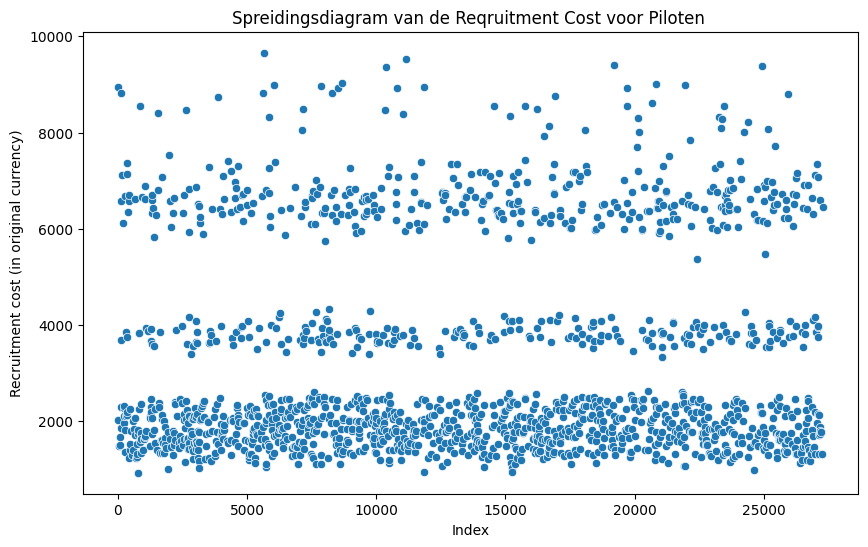

In [28]:
import seaborn as sns

# Maak een scatterplot om de outliers in de 'Recruitment cost (in original currency)' voor piloten weer te geven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=piloten_df, x=piloten_df.index, y='Recruitment cost (in original currency)')

# Voeg een titel en labels toe voor meer duidelijkheid
plt.title('Spreidingsdiagram van de Reqruitment Cost voor Piloten ')
plt.xlabel('Index')
plt.ylabel('Recruitment cost (in original currency)')
plt.show()

In de spreidingsgrafiek zien we dat de wervingskosten voor piloten geconcentreerd zijn rond specifieke waarden, met duidelijke clusters bij 2000, 4000, 6000 en 8000. Er is geen duidelijk verband of patroon zichtbaar met de index, wat erop wijst dat de kosten consistent binnen bepaalde niveaus vallen, ongeacht de volgorde van de data.

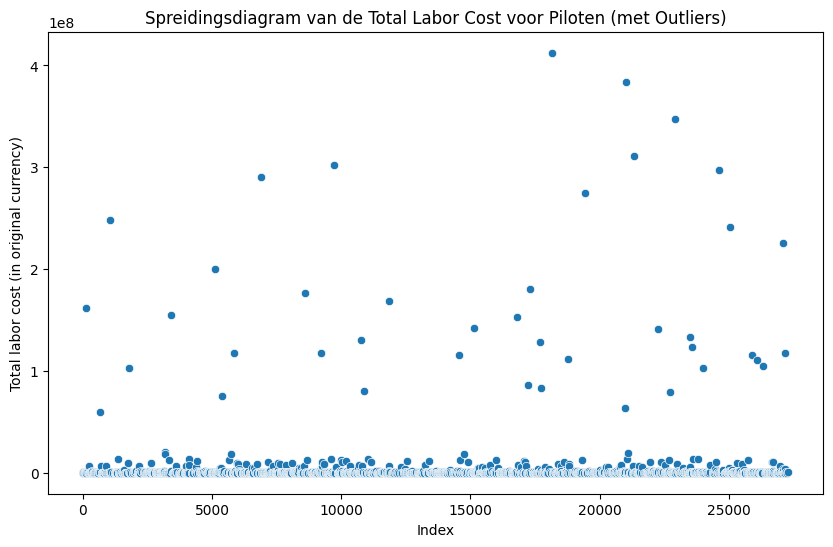

In [29]:
import seaborn as sns

# Maak een scatterplot om de outliers in de 'Total labor cost (in original currency)' voor piloten weer te geven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=piloten_df, x=piloten_df.index, y='Total labor cost (in original currency)')

# Voeg een titel en labels toe voor meer duidelijkheid
plt.title('Spreidingsdiagram van de Total Labor Cost voor Piloten (met Outliers)')
plt.xlabel('Index')
plt.ylabel('Total labor cost (in original currency)')
plt.show()

In deze spreidingsgrafiek van de *Total Labor Cost* voor piloten zijn enkele extreme uitschieters zichtbaar. Het grootste deel van de kosten ligt dicht bij de nul-lijn, maar er zijn een aantal uitzonderlijke gevallen met zeer hoge arbeidskosten, die ver boven de rest uitsteken. Deze outliers suggereren dat bepaalde piloten aanzienlijk hogere arbeidskosten hebben dan gemiddeld.

Kijkend naar de visualisatie zie je wat outliers in de total labor cost. Deze ga ik hieronder eruit filteren.

In [30]:
# Definieer een bovengrens voor outliers: neem bijvoorbeeld het 95e percentiel van de 'Total labor cost (in original currency)' kolom
upper_limit = piloten_df['Total labor cost (in original currency)'].quantile(0.95)

# Filter de dataset om outliers te verwijderen (waarden boven het 95e percentiel)
filtered_piloten_df = piloten_df[piloten_df['Total labor cost (in original currency)'] <= upper_limit]

# Groepeer de gefilterde dataset per wervingsmethode en bereken het gemiddelde van de 'Total labor cost (in original currency)' kolom
gemiddelde_kosten_per_piloot_filtered = filtered_piloten_df.groupby('Hiring channel')['Total labor cost (in original currency)'].mean().reset_index()

# Hernoem de kolom voor duidelijkheid
gemiddelde_kosten_per_piloot_filtered.rename(columns={'Total labor cost (in original currency)': 'gemiddelde kosten per piloot'}, inplace=True)

# Print het resultaat
print(gemiddelde_kosten_per_piloot_filtered)


       Hiring channel  gemiddelde kosten per piloot
0   Corporate Website                 457213.600000
1           Glassdoor                 385613.043250
2           Instagram                 508195.303438
3            LinkedIn                 777307.963636
4             Missing                 592617.232220
5      Own recruiters                 635813.400165
6  Recruitment agency                 690089.481639
7            Referral                 883158.242110
8          University                 528542.268226


In [31]:
# Groepeer de gefilterde dataset per wervingsmethode en bereken het gemiddelde van de 'Recruitment cost (in original currency)' kolom
gemiddelde_kosten_per_piloot = piloten_df.groupby('Hiring channel')['Recruitment cost (in original currency)'].mean().reset_index()

# Hernoem de kolom voor duidelijkheid
gemiddelde_kosten_per_piloot.rename(columns={'Recruitment cost (in original currency)': 'gemiddelde kosten per piloot'}, inplace=True)

# Print het resultaat
print(gemiddelde_kosten_per_piloot)

       Hiring channel  gemiddelde kosten per piloot
0   Corporate Website                   2471.457627
1           Glassdoor                   2643.444444
2           Instagram                   2417.090909
3            LinkedIn                   2436.785714
4             Missing                   3882.095339
5      Own recruiters                   2552.703704
6  Recruitment agency                   2339.187500
7            Referral                   2333.129310
8          University                   2539.615385


Ik ga nu onderzoeken of het ziekteverzuim hoger is bij piloten dan de gemiddelde medewerker.

In [32]:
#het dataframe voor piloten heb ik al nu ga ik die van alle andere medewerkers maken
zondertimeframe_df = pd.read_csv('data.csv')
andere_df = zondertimeframe_df[zondertimeframe_df['Functional area level 2'] != 'Pilots']

# Bereken het gemiddelde ziekteverzuim voor piloten
average_sick_days_pilots = piloten_df['Lost working days'].mean()

# Bereken het gemiddelde ziekteverzuim voor andere medewerkers
average_sick_days_others = andere_df['Lost working days'].mean()

# Print de gemiddelden
print(f"Gemiddeld ziekteverzuim per maand onder piloten: {average_sick_days_pilots:.2f} dagen")
print(f"Gemiddeld ziekteverzuim per maand onder andere medewerkers: {average_sick_days_others:.2f} dagen")

Gemiddeld ziekteverzuim per maand onder piloten: 0.02 dagen
Gemiddeld ziekteverzuim per maand onder andere medewerkers: 0.09 dagen


C:\Users\merli\AppData\Local\Temp\ipykernel_46500\921753382.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'Employee engagement': 'mean', 'Lost working days': 'sum'})


Mean Absolute Error: 3.410627198713769
R² Score: -0.34898756190095925


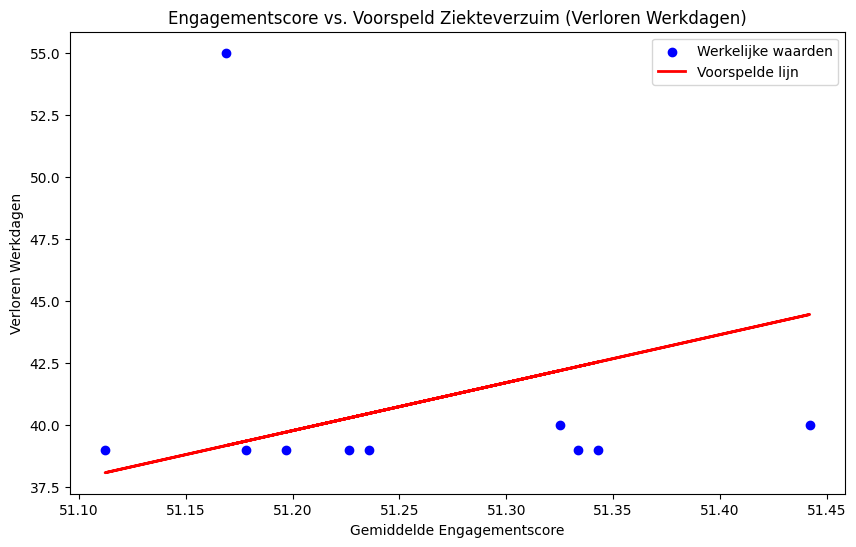

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Groepeer de data per maand en bereken het gemiddelde van engagement en de som van verloren werkdagen
monthly_data = df.resample('M').agg({'Employee engagement': 'mean', 'Lost working days': 'sum'})

# Splits de data in features (X) en target (y)
X = monthly_data[['Employee engagement']]
y = monthly_data['Lost working days']

# Verdeel de data in een trainings- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train het model
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspel de ziekteverzuimwaarden op de testset
y_pred = model.predict(X_test)

# Evaluatie van het model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Visualisatie van de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Werkelijke waarden')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Voorspelde lijn')
plt.title('Engagementscore vs. Voorspeld Ziekteverzuim (Verloren Werkdagen)')
plt.xlabel('Gemiddelde Engagementscore')
plt.ylabel('Verloren Werkdagen')
plt.legend()
plt.show()


Het model gebruikt de maandelijkse gemiddelde Employee engagement als feature (X) en de som van Lost working days als target (y). De resultaten laten een zwakke positieve lijn zien, die een lichte stijging in verloren werkdagen voorspelt naarmate de engagementscore toeneemt. Echter, de spreiding van de werkelijke waarden (blauwe punten) rond de rode voorspelde lijn bevestigt dat dit model geen sterk verband vindt tussen engagement en verloren werkdagen.

In [34]:
import pandas as pd
from IPython.display import display

# Groepeer de data per maand en bereken het gemiddelde van engagement en de som van verloren werkdagen
monthly_data = df.resample('M').agg({'Employee engagement': 'mean', 'Lost working days': 'sum'}).reset_index()

# Toon de geaggregeerde data in een tabel
display(monthly_data)


C:\Users\merli\AppData\Local\Temp\ipykernel_46500\1233068403.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'Employee engagement': 'mean', 'Lost working days': 'sum'}).reset_index()


,Timeslice,Employee engagement,Lost working days
0,2020-08-31,51.425676,40
1,2020-09-30,51.414276,40
2,2020-10-31,51.413218,40
3,2020-11-30,51.414439,40
4,2020-12-31,51.442063,40
5,2021-01-31,51.389375,40
6,2021-02-28,51.422253,40
7,2021-03-31,51.370979,40
8,2021-04-30,51.243796,40
9,2021-05-31,51.238130,40


In de tabel zien we dat de gemiddelde *Employee engagement* score per maand redelijk stabiel blijft rond de 51, met kleine fluctuaties. Het aantal *Lost working days* blijft ook constant op 40 in de meeste maanden, met enkele uitschieters naar 50. Deze consistentie in de gegevens suggereert weinig variatie, wat kan verklaren waarom de regressieanalyse slechts een zwak verband liet zien tussen engagement en verloren werkdagen.

Correlatiecoëfficiënt tussen engagement en verloren werkdagen: 0.38


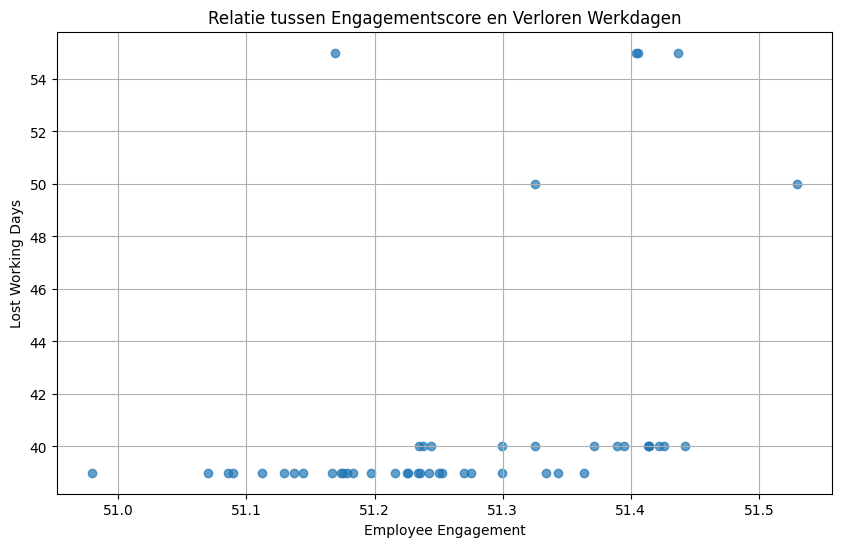

In [35]:
import matplotlib.pyplot as plt

# Bereken de correlatie tussen de engagementscore en verloren werkdagen
correlation = monthly_data['Employee engagement'].corr(monthly_data['Lost working days'])
print(f"Correlatiecoëfficiënt tussen engagement en verloren werkdagen: {correlation:.2f}")

# Maak een scatterplot om de relatie te visualiseren
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Employee engagement'], monthly_data['Lost working days'], alpha=0.7)
plt.title('Relatie tussen Engagementscore en Verloren Werkdagen')
plt.xlabel('Employee Engagement')
plt.ylabel('Lost Working Days')
plt.grid(True)
plt.show()


In deze scatterplot is te zien dat de meeste punten rond 40 verloren werkdagen liggen, ongeacht de variatie in de *Employee Engagement* score. Er is weinig spreiding in de data, wat aangeeft dat er nauwelijks een verband is tussen de engagementscore en het aantal verloren werkdagen. De data lijkt voornamelijk geconcentreerd zonder duidelijke trend.

In [36]:
# Bereken de totale hoeveelheid leavers en de gemiddelde engagementscore per maand
monthly_leavers = df.resample('M').agg({'Is leaver': 'sum', 'Employee engagement': 'mean'}).reset_index()

# Bereken de correlatie tussen de engagementscore en het aantal leavers per maand
correlation_leavers = monthly_leavers['Is leaver'].corr(monthly_leavers['Employee engagement'])

# Print de resultaten
print(f"Correlatie tussen engagementscore en aantal leavers: {correlation_leavers:.2f}")
print("\nMaandelijkse gegevens van leavers en engagementscore:")
print(monthly_leavers)

Correlatie tussen engagementscore en aantal leavers: 0.23

Maandelijkse gegevens van leavers en engagementscore:
    Timeslice  Is leaver  Employee engagement
0  2020-08-31          7            51.425676
1  2020-09-30          6            51.414276
2  2020-10-31          6            51.413218
3  2020-11-30          9            51.414439
4  2020-12-31         15            51.442063
5  2021-01-31         46            51.389375
6  2021-02-28         53            51.422253
7  2021-03-31         37            51.370979
8  2021-04-30          7            51.243796
9  2021-05-31          7            51.238130
10 2021-06-30          8            51.234865
11 2021-07-31          8            51.299636
12 2021-08-31          8            51.325345
13 2021-09-30         28            51.394642
14 2021-10-31         33            51.529497
15 2021-11-30         34            51.325257
16 2021-12-31         36            51.436993
17 2022-01-31         19            51.405948
18 2022-02-28

C:\Users\merli\AppData\Local\Temp\ipykernel_46500\3631037829.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_leavers = df.resample('M').agg({'Is leaver': 'sum', 'Employee engagement': 'mean'}).reset_index()


Dit geeft aan dat piloten minder Lost working days hebben dan gemiddelde andere medewerkers. 

In [37]:
# Controleer het aantal rijen en unieke maanden
total_rows = len(df)
unique_months = df.index.to_period('M').nunique()

print("Totaal aantal rijen:", total_rows)
print("Aantal unieke maanden:", unique_months)


Totaal aantal rijen: 69230
Aantal unieke maanden: 48


In [38]:
# Gemiddelde van de originele data berekenen
average_recruitment_cost = df['Recruitment cost (in original currency)'].mean()
average_hires = df['Is hire'].mean()

print("Gemiddelde wervingskosten per gebeurtenis:", average_recruitment_cost)
print("Gemiddeld aantal aannames per gebeurtenis:", average_hires)


Gemiddelde wervingskosten per gebeurtenis: 3420.003120034667
Gemiddeld aantal aannames per gebeurtenis: 0.013722374693052144
